In [8]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

In [9]:
train_images_path = 'dataset/Modi'
train_cleaned_path = 'dataset/Trump'
train_images = sorted(os.listdir(train_images_path))
train_cleaned = sorted(os.listdir(train_cleaned_path))

X = []
y = []

for img in train_images:
    img_path = os.path.join(train_images_path, img)
    im = load_img(img_path,color_mode = 'grayscale',target_size = (540, 260))
    im = img_to_array(im).astype('float32')/255
    X.append(im)
for img in train_cleaned:
    img_path = os.path.join(train_cleaned_path, img)
    im = load_img(img_path,color_mode = 'grayscale', target_size = (540, 260))
    im = img_to_array(im).astype('float32')/255
    y.append(im)
    
X = np.array(X)
Z = np.array(y)

print(X.shape,Z.shape)

(10, 540, 260, 1) (10, 540, 260, 1)


In [10]:
input_img = Input(shape=(540, 260, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same',name='x1')(input_img)
x = MaxPooling2D((2, 2), padding='same',name='x2')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same',name='x3')(x)
x = MaxPooling2D((2, 2), padding='same',name='x4')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same',name='x5')(x)
encoded = MaxPooling2D((2, 2), padding='same',name='x6')(x)



x = Conv2D(16, (3, 3), activation='relu', padding='same',name='x7')(encoded)
x = UpSampling2D((2, 2),name='x8')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same',name='x9')(x)
x = UpSampling2D((2, 2),name='x10')(x)
x = Conv2D(32, (3, 3), activation='relu',name='x11')(x)
x = UpSampling2D((2, 2),name='x12')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='x13')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
history = autoencoder.fit(X, X, epochs = 1000, verbose = True)
autoencoder.save('autoencoder1.h5')

Train on 10 samples
Epoch 1/1000
10/10 [==============================] - 5s 537ms/sample - loss: 0.6872
Epoch 2/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6775
Epoch 3/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6657
Epoch 4/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6525
Epoch 5/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6395
Epoch 6/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6322
Epoch 7/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6328
Epoch 8/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6286
Epoch 9/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6193
Epoch 10/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6137
Epoch 11/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6118
Epoch 12/1000
10/10 [==============================] 

Epoch 98/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4319
Epoch 99/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4319
Epoch 100/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.4321
Epoch 101/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.4325
Epoch 102/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4324
Epoch 103/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.4321
Epoch 104/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4315
Epoch 105/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4312
Epoch 106/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4312
Epoch 107/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4314
Epoch 108/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.4315
Epoch 109/1000
10/10 [==============================] - 

Epoch 194/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.4261
Epoch 195/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4259
Epoch 196/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4260
Epoch 197/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4262
Epoch 198/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.4263
Epoch 199/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4263
Epoch 200/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4262
Epoch 201/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4260
Epoch 202/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4258
Epoch 203/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4257
Epoch 204/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4257
Epoch 205/1000
10/10 [==============================] 

Epoch 290/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4281
Epoch 291/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4268
Epoch 292/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4265
Epoch 293/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4273
Epoch 294/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4261
Epoch 295/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4268
Epoch 296/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4260
Epoch 297/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4261
Epoch 298/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4264
Epoch 299/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4256
Epoch 300/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4262
Epoch 301/1000
10/10 [==============================] 

Epoch 386/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.4240
Epoch 387/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4240
Epoch 388/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4240
Epoch 389/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4240
Epoch 390/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 391/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 392/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 393/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 394/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 395/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 396/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 397/1000
10/10 [==============================] 

Epoch 482/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4232
Epoch 483/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4231
Epoch 484/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4232
Epoch 485/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4231
Epoch 486/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4231
Epoch 487/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4231
Epoch 488/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4231
Epoch 489/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4231
Epoch 490/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4231
Epoch 491/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4231
Epoch 492/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4230
Epoch 493/1000
10/10 [==============================] 

Epoch 578/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4221
Epoch 579/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4222
Epoch 580/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4223
Epoch 581/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4224
Epoch 582/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4226
Epoch 583/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4226
Epoch 584/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4227
Epoch 585/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4225
Epoch 586/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4224
Epoch 587/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4222
Epoch 588/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4221
Epoch 589/1000
10/10 [==============================] 

Epoch 674/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4217
Epoch 675/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4217
Epoch 676/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4218
Epoch 677/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4217
Epoch 678/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4217
Epoch 679/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4217
Epoch 680/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4216
Epoch 681/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4216
Epoch 682/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4216
Epoch 683/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4216
Epoch 684/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.4216
Epoch 685/1000
10/10 [==============================] 

Epoch 770/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4463
Epoch 771/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.4533
Epoch 772/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.4348
Epoch 773/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4498
Epoch 774/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4404
Epoch 775/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4363
Epoch 776/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.4441
Epoch 777/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4384
Epoch 778/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4357
Epoch 779/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.4408
Epoch 780/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.4377
Epoch 781/1000
10/10 [==============================] 

Epoch 866/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4241
Epoch 867/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4240
Epoch 868/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4240
Epoch 869/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4240
Epoch 870/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4240
Epoch 871/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 872/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 873/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 874/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 875/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4239
Epoch 876/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4238
Epoch 877/1000
10/10 [==============================] 

Epoch 962/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.4227
Epoch 963/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4227
Epoch 964/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4227
Epoch 965/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4227
Epoch 966/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4227
Epoch 967/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4227
Epoch 968/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4227
Epoch 969/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4226
Epoch 970/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4226
Epoch 971/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4226
Epoch 972/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.4226
Epoch 973/1000
10/10 [==============================] 

# Second model

In [11]:
input_img1 = Input(shape=(540, 260, 1))  

y = Conv2D(32, (3, 3), activation='relu', padding='same',name='y1')(input_img1)
y = MaxPooling2D((2, 2), padding='same',name='y2')(y)
y = Conv2D(32, (3, 3), activation='relu', padding='same',name='y3')(y)
y = MaxPooling2D((2, 2), padding='same',name='y4')(y)
y = Conv2D(16, (3, 3), activation='relu', padding='same',name='y5')(y)
encoded1 = MaxPooling2D((2, 2), padding='same',name='y6')(y)


y = Conv2D(16, (3, 3), activation='relu', padding='same',name='y7')(encoded1)
y = UpSampling2D((2, 2),name='y8')(y)
y = Conv2D(32, (3, 3), activation='relu', padding='same',name='y9')(y)
y = UpSampling2D((2, 2),name='y10')(y)
y = Conv2D(32, (3, 3), activation='relu',name='y11')(y)
y = UpSampling2D((2, 2),name='y12')(y)
decoded2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='y13')(y)

autoencoder1 = Model(input_img1, decoded2)
autoencoder1.compile(optimizer='Adam', loss='binary_crossentropy')
history1 = autoencoder1.fit(Z, Z,epochs = 1000, verbose = True)
autoencoder1.save('autoencoder2.h5')

Train on 10 samples
Epoch 1/1000
10/10 [==============================] - 1s 115ms/sample - loss: 0.6932
Epoch 2/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6910
Epoch 3/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6887
Epoch 4/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6855
Epoch 5/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6821
Epoch 6/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6787
Epoch 7/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.6737
Epoch 8/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6675
Epoch 9/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6595
Epoch 10/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6503
Epoch 11/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.6385
Epoch 12/1000
10/10 [==============================] 

Epoch 98/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5199
Epoch 99/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5199
Epoch 100/1000
10/10 [==============================] - 0s 17ms/sample - loss: 0.5199
Epoch 101/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5199
Epoch 102/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5200
Epoch 103/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5201
Epoch 104/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5203
Epoch 105/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5206
Epoch 106/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5205
Epoch 107/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5202
Epoch 108/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5196
Epoch 109/1000
10/10 [==============================] - 

Epoch 194/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5172
Epoch 195/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5173
Epoch 196/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5174
Epoch 197/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5176
Epoch 198/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5177
Epoch 199/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5177
Epoch 200/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5178
Epoch 201/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5176
Epoch 202/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5175
Epoch 203/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5172
Epoch 204/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5171
Epoch 205/1000
10/10 [==============================] 

Epoch 290/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5163
Epoch 291/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5164
Epoch 292/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5163
Epoch 293/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5162
Epoch 294/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5162
Epoch 295/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5162
Epoch 296/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5162
Epoch 297/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5162
Epoch 298/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5162
Epoch 299/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5163
Epoch 300/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5163
Epoch 301/1000
10/10 [==============================] 

Epoch 386/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 387/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 388/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 389/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 390/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 391/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 392/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 393/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 394/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5156
Epoch 395/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5157
Epoch 396/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5158
Epoch 397/1000
10/10 [==============================] 

Epoch 482/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5153
Epoch 483/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5153
Epoch 484/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5154
Epoch 485/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.5154
Epoch 486/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5153
Epoch 487/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5152
Epoch 488/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5152
Epoch 489/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5152
Epoch 490/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5152
Epoch 491/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5153
Epoch 492/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5153
Epoch 493/1000
10/10 [==============================] 

Epoch 578/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5149
Epoch 579/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5150
Epoch 580/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5150
Epoch 581/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5152
Epoch 582/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5154
Epoch 583/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5159
Epoch 584/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5165
Epoch 585/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5171
Epoch 586/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.5173
Epoch 587/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.5163
Epoch 588/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.5151
Epoch 589/1000
10/10 [==============================] 

Epoch 674/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5147
Epoch 675/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5147
Epoch 676/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5148
Epoch 677/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5149
Epoch 678/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5149
Epoch 679/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5147
Epoch 680/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5147
Epoch 681/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5147
Epoch 682/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5148
Epoch 683/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5148
Epoch 684/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5148
Epoch 685/1000
10/10 [==============================] 

Epoch 770/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.5147
Epoch 771/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.5147
Epoch 772/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5148
Epoch 773/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5149
Epoch 774/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.5150
Epoch 775/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5150
Epoch 776/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5149
Epoch 777/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5148
Epoch 778/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5146
Epoch 779/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5145
Epoch 780/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5144
Epoch 781/1000
10/10 [==============================] 

Epoch 866/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5144
Epoch 867/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5144
Epoch 868/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5144
Epoch 869/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5143
Epoch 870/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5143
Epoch 871/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5143
Epoch 872/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5143
Epoch 873/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5143
Epoch 874/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5143
Epoch 875/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5143
Epoch 876/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5143
Epoch 877/1000
10/10 [==============================] 

Epoch 962/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5142
Epoch 963/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5141
Epoch 964/1000
10/10 [==============================] - 0s 19ms/sample - loss: 0.5141
Epoch 965/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5141
Epoch 966/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5141
Epoch 967/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5141
Epoch 968/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5141
Epoch 969/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5141
Epoch 970/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5142
Epoch 971/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5142
Epoch 972/1000
10/10 [==============================] - 0s 18ms/sample - loss: 0.5142
Epoch 973/1000
10/10 [==============================] 

In [31]:
from tensorflow.keras.models import load_model

modi=load_model('autoencoder1.h5')

encoder=Model(modi.input,modi.get_layer('x6').output)
encoder.save('encoder.h5')

trump=load_model('autoencoder2.h5')
print(modi.get_layer('x6').output)
c=encoder.predict(Z)
x=cv2.reshape(c,(68,3))
input_img3 = Input(shape=(68, 33, 1)) 
u = Conv2D(16, (3, 3), activation='relu', padding='same',name='d1')(input_img3)
u = UpSampling2D((2, 2),name='d2')(u)
u = Conv2D(32, (3, 3), activation='relu', padding='same',name='d3')(u)
u = UpSampling2D((2, 2),name='d4')(u)
u = Conv2D(32, (3, 3), activation='relu',name='d5')(u)
u = UpSampling2D((2, 2),name='d6')(u)
decoded3 = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='d7')(u)

decoder=Model(input_img3,decoded3)
decoder.compile(optimizer='Adam', loss='binary_crossentropy')
history3 = decoder.fit(c,c,epochs = 1000, verbose = True)
deocoder.save('deocoder.h5')

Tensor("x6_12/Identity:0", shape=(None, 68, 33, 16), dtype=float32)


ValueError: Error when checking input: expected input_13 to have shape (68, 33, 1) but got array with shape (68, 33, 16)

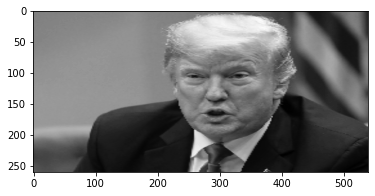

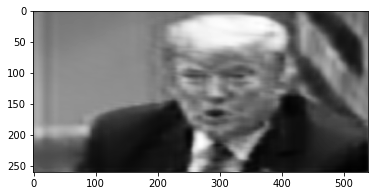

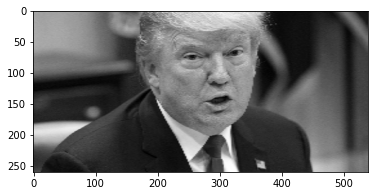

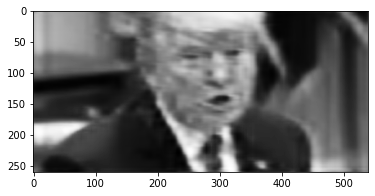

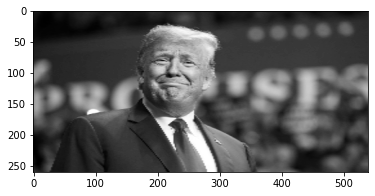

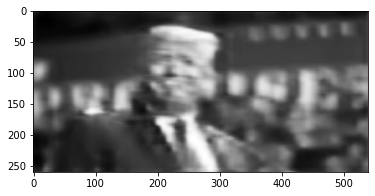

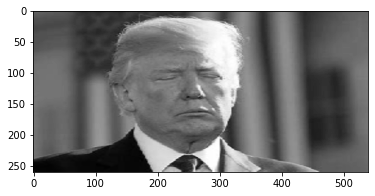

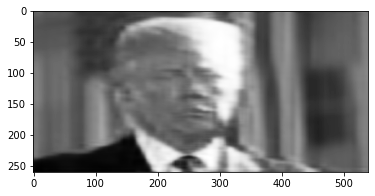

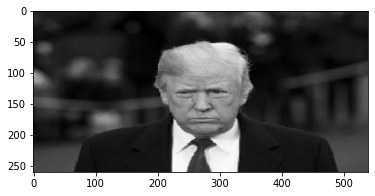

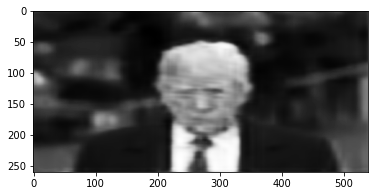

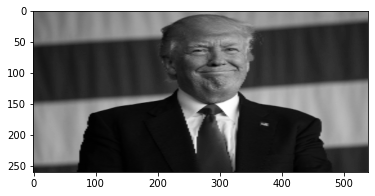

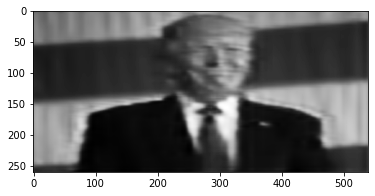

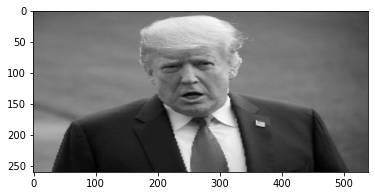

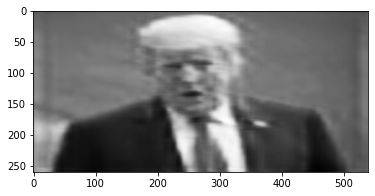

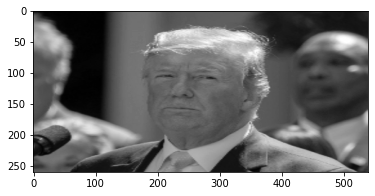

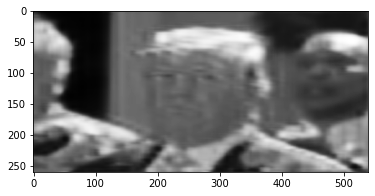

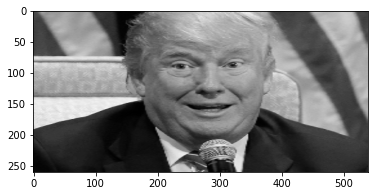

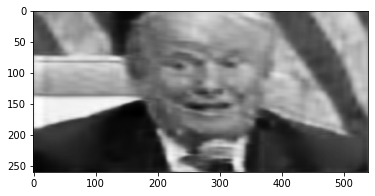

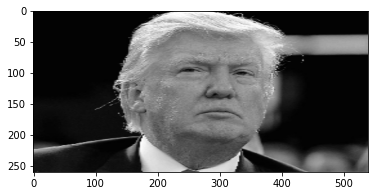

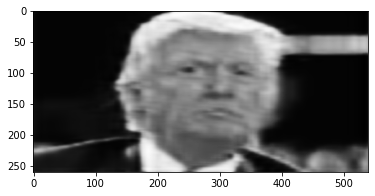

In [20]:
import matplotlib.pyplot as plt
import cv2
import os


test_images_path  = 'dataset/Trump'
test_images = sorted(os.listdir(test_images_path))
X_test = []
for img in test_images:
    img_path = os.path.join(test_images_path, img)
    im = load_img(img_path, color_mode = 'grayscale', target_size = (540, 260))
    im = img_to_array(im).astype('float32')/255
    X_test.append(im)
    
X_test = np.array(X_test)

hehe=modi.predict(X_test)



for i in range(10):
   # hehe.shape()
    plt.imshow(cv2.resize(X_test[i],(540,260)),cmap='gray')
    plt.show()
    plt.imshow(cv2.resize(hehe[i],(540,260)),cmap='gray')
    plt.show()
    